# Linear Classification Lab

## 准备工作
### 环境准备
请确保完成以下依赖包的安装，并且通过下面代码来导入与验证。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
plt.style.use('default')

### 数据集准备

我们将使用以下二维数据集来进行线性分类器的拟合。

请执行下面的代码以加载数据集并对其进行可视化。

In [2]:
from data_generator import gen_2D_dataset

x_train, y_train = gen_2D_dataset(100)
x_test, y_test = gen_2D_dataset(10) 

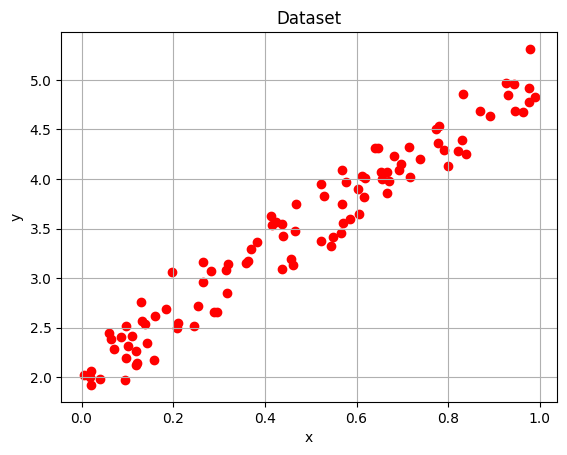

In [3]:
from vis_util import visualize_2D_dataset, visualize_2D_border

visualize_2D_dataset(x_train, y_train)

## 线性回归 (10 pts)

在这一部分，你需要通过最小二乘法的闭式解来解决线性回归问题，并计算以下损失函数的值。

$$ L(w,b) = \frac{1}{n} \sum_{i\in[n]} (y_i - (w^Tx_i + b))^2 $$

你可能会用到的函数有：`numpy.linalg.inv()`、`numpy.dot()`、`numpy.transpose()`、`numpy.ones()`、`numpy.concatenate()`、`numpy.sum()` 等。

$$ Closed\ Solution: \theta = (X^TX)^{-1}X^TY$$

In [4]:
# In this section, please implement the linear regression using the closed form solution 

# TODO: firstly, add a column of 1s to the x_train as the bias term
n_obs = len(x_train)

X_train = x_train.reshape(n_obs,1)
bias_term = np.ones((n_obs,1))
X_train = np.concatenate([X_train,bias_term],axis=1)

# TODO: secondly, use the closed form solution to calculate the best theta
Y_train = y_train.reshape(n_obs,1)
theta =np.linalg.inv(X_train.T@X_train)@X_train.T@Y_train

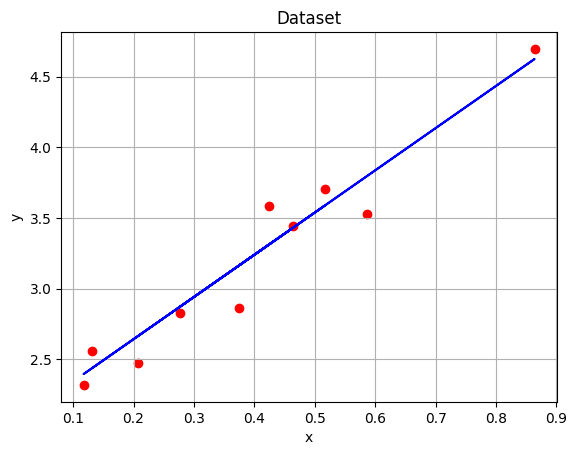

In [17]:
# In this section, please visualize the linear regression solution in 2D using the visualize_2D_border function
n_test = len(x_test)

# TODO: firstly, compute the y_pred using the best theta
X_test = x_test.reshape(n_test,1)
bias_term = np.ones((n_test,1))
X_test = np.concatenate([X_test,bias_term],axis=1)
y_pred = (X_test@theta).flatten()

# TODO: Secondly, visualize the linear regression solution in 2D using the visualize_2D_border function
visualize_2D_border(x_test, y_test, y_pred)

In [18]:
# Define the loss function
def compute_loss(X, y, theta):
    ''' 
    Compute the loss function for linear regression

    Args:
        X: the input data
        y: the label
        theta: the weights
    Returns:
        the loss value (a scalar)
    '''
    # TODO: firstly, compute the length of the dataset
    n_obs = len(y)
    
    # TODO: secondly, compute the y_pred using the input data and the weights
    y_pred = (X@theta).flatten()

    # TODO: thirdly, compute the loss using the y_pred and the label
    Loss = 1/n_obs*np.sum((y-y_pred)**2)
    return Loss


In [12]:
# In this section, compute the loss on the training set and the test set

# TODO: the loss on the training set (invoke the compute_loss function)
train_loss = compute_loss(X_train,y_train,theta)

# TODO: the loss on the testing test
test_loss = compute_loss(X_test,y_test,theta)

# TODO: print the training loss and the test loss
print(f'Training loss: {train_loss}')
print(f'Test loss: {test_loss}')

Training loss: 0.039697545948985925
Test loss: 0.0312921060060573
